# Assignment 1: Inference using MMSegmentation

The first step to develop a solution is just try any model that is available online.

**Goal: Try running road segmentation inference on a sample of KITTI dataset, using any model from MMSegmentation, and evaluate the results visually.**

## Step 1. Prepare test data

First download the dataset from KITTI website.

1. Go to raw data of KITTI dataset [here](https://www.cvlibs.net/datasets/kitti/raw_data.php).
2. Choose any video from that page that you like
3. Then, copy any download link of the `[unsynced+unrectified data]`
4. Download the data to notebook using `wget`
5. Use the images in the `image_02` directory of the downloaded dataset. You can copy them to another directory.

In [ ]:
# change the link to the data link that you chose
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0005/2011_09_26_drive_0005_extract.zip

--2024-01-14 07:29:46--  https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0005/2011_09_26_drive_0005_extract.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.171.149, 52.219.169.177, 52.219.210.5, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.171.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978290876 (933M) [application/zip]
Saving to: ‘2011_09_26_drive_0005_extract.zip’

2011_09_26_drive_00 100%[===================>] 932.97M  19.9MB/s    in 48s     

2024-01-14 07:30:34 (19.4 MB/s) - ‘2011_09_26_drive_0005_extract.zip’ saved [978290876/978290876]



In [ ]:
# change the zip file name to the one that you downloaded
!unzip 2011_09_26_drive_0005_extract.zip

Archive:  2011_09_26_drive_0005_extract.zip
   creating: 2011_09_26/2011_09_26_drive_0005_extract/oxts/
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/timestamps.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/dataformat.txt  
   creating: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000001030.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000001169.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000000210.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000000145.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000000013.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000001611.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000000166.txt  
 extracting: 2011_09_26/2011_09_26_drive_0005_extract/oxts/data/0000001605.txt  
 extracting: 2011_09_26/2011_09

In [ ]:
# change the source directory name to the one that you extracted
# copy the images to `content/images`
!cp -r 2011_09_26/2011_09_26_drive_0005_extract/image_02/data "/content/images"

## Step 2. Install MMSegmentation

Just follow the step in the documentation [here](https://mmsegmentation.readthedocs.io/en/latest/get_started.html).

In [ ]:
!pip install -U openmim
!mim install -U mmengine
!mim install "mmcv>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.4/450.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 9.2 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 MB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
!pip install "mmsegmentation>=1.0.0"
!pip install "mmdet>=3.0.0rc4"

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16412, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 16412 (delta 23), reused 35 (delta 6), pack-reused 16327
Receiving objects: 100% (16412/16412), 43.80 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (11402/11402), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.7 MB/s eta 0:00:00


## Step 3. Run inference

Your task is to **choose 5 models** available in the mmsegmentation that are already trained with Cityscapes dataset. Check the [supported methods here](https://github.com/open-mmlab/mmsegmentation/tree/main#benchmark-and-model-zoo). But 2 of them must be PIDNet and Mask2Former. First:

- From `mmsegmentation` models documentation, you can see each model's accuracy on Cityscapes dataset. Create a table that shows the model name, input size, and accuracy (mAcc and mIoU) for all models you chose to support your analysis about model comparisons.

Do the following for each model:

- Run inference on the images one-by-one (batch size 1). But crop the center of the image so that the image size is 384x384. We use this size for faster training later.
- The model might gives you many separated regions of road. Only take road region with largest area (use OpenCV's connected component analysis). We do that because small regions sometimes indicate noise or false detections.
- Measure the average time to process one image.
- Visualize the results for all images that you have downloaded.

To get information how to do the inference, read the documentation!

**Do not use `MMSegInferencer` API, but instead use `init_model` and `inference_model` function. Also, when creating visualization please create visualization logic by your own without using `show_result_pyplot` function**

**The class ID for the road is 0 for pretrained Cityscapes model.**

You need to submit:

- This notebook that has been filled with your code.
- Result images for each model. Which one is the most accurate?
- Note of inference time of each model. Which one is fastest?
- Your analysis, including accuracy table. Add processing time to the table. You can write it in a word file.




For example, for this image

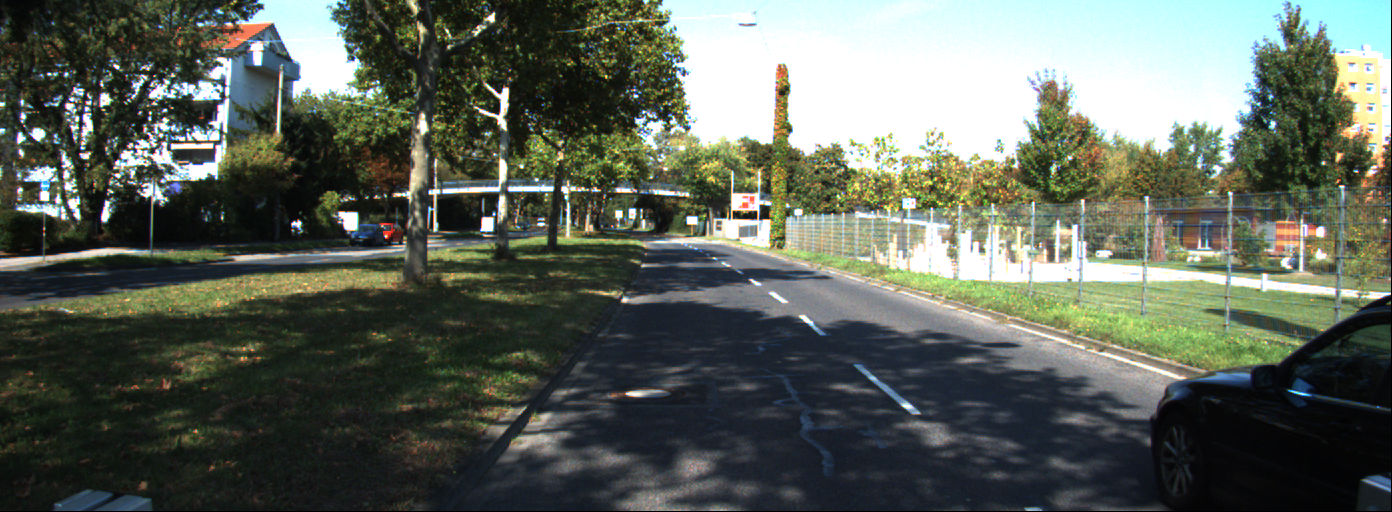

The output should be like, where the lighter parts represent the road segmentation results (as you can see, the result is not good for this example)

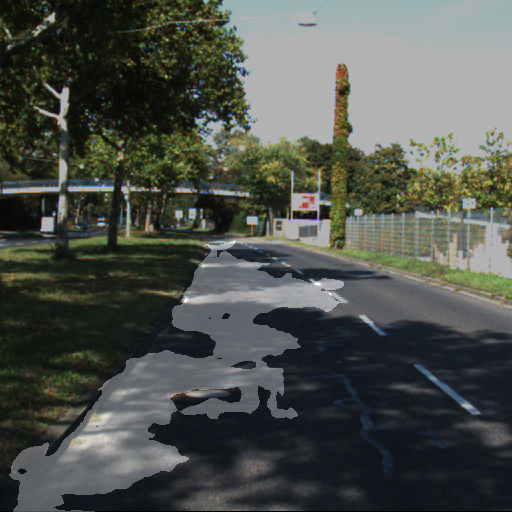

Do that for all images that you have downloaded. What do you think about the results?

In [ ]:
###############################################################
# Please write code to gives the above expected results from
# here. Don't forget to save the visualized images
###############################################################

In [ ]:
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth -P /content/checkpoint/pidnet

--2024-01-14 07:32:02--  https://download.openmmlab.com/mmsegmentation/v0.5/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.23.145, 47.246.23.146, 47.246.23.147, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.23.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51073991 (49M) [application/octet-stream]
Saving to: ‘/content/checkpoint/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth’

pidnet-s_2xb6-120k_ 100%[===================>]  48.71M  17.3MB/s    in 2.8s    

2024-01-14 07:32:05 (17.3 MB/s) - ‘/content/checkpoint/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth’ saved [51073991/51073991]



In [ ]:
!wget https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth -P /content/checkpoint/mask2former

--2024-01-11 12:45:46--  https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.214, 8.48.85.207, 8.48.85.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234517437 (224M) [application/octet-stream]
Saving to: ‘/content/checkpoint/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth’

mask2former_r50_8xb 100%[===================>] 223.65M  21.4MB/s    in 10s     

2024-01-11 12:45:57 (21.8 MB/s) - ‘/content/checkpoint/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth’ saved [234517437/234517437]



In [ ]:
!wget https://download.openmmlab.com/mmsegmentation/v0.5/apcnet/apcnet_r50-d8_512x1024_40k_cityscapes/apcnet_r50-d8_512x1024_40k_cityscapes_20201214_115717-5e88fa33.pth -P /content/checkpoint/apcnet

--2024-01-11 12:45:57--  https://download.openmmlab.com/mmsegmentation/v0.5/apcnet/apcnet_r50-d8_512x1024_40k_cityscapes/apcnet_r50-d8_512x1024_40k_cityscapes_20201214_115717-5e88fa33.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.214, 8.48.85.207, 8.48.85.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225818316 (215M) [application/octet-stream]
Saving to: ‘/content/checkpoint/apcnet/apcnet_r50-d8_512x1024_40k_cityscapes_20201214_115717-5e88fa33.pth’

apcnet_r50-d8_512x1 100%[===================>] 215.36M  17.4MB/s    in 11s     

2024-01-11 12:46:08 (19.2 MB/s) - ‘/content/checkpoint/apcnet/apcnet_r50-d8_512x1024_40k_cityscapes_20201214_115717-5e88fa33.pth’ saved [225818316/225818316]



In [ ]:
!wget https://download.openmmlab.com/mmsegmentation/v0.5/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024_20230426_145312-6a5e5174.pth -P /content/checkpoint/ddrnet

--2024-01-11 12:46:08--  https://download.openmmlab.com/mmsegmentation/v0.5/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024_20230426_145312-6a5e5174.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.214, 8.48.85.207, 8.48.85.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61441783 (59M) [application/octet-stream]
Saving to: ‘/content/checkpoint/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024_20230426_145312-6a5e5174.pth’

ddrnet_23-slim_in1k 100%[===================>]  58.59M  20.0MB/s    in 2.9s    

2024-01-11 12:46:12 (20.0 MB/s) - ‘/content/checkpoint/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024_20230426_145312-6a5e5174.pth’ saved [61441783/61441783]



In [ ]:
!wget https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth -P /content/checkpoint/deeplabv3

--2024-01-11 12:46:12--  https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.214, 8.48.85.207, 8.48.85.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272761181 (260M) [application/octet-stream]
Saving to: ‘/content/checkpoint/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth’

deeplabv3_r50-d8_51 100%[===================>] 260.12M  20.0MB/s    in 13s     

2024-01-11 12:46:26 (19.9 MB/s) - ‘/content/checkpoint/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth’ saved [272761181/272761181]



#### Inference 1: PIDNet-S

In [ ]:
import cv2
import numpy as np
from mmseg.apis import init_model, inference_model
from typing import List
from pathlib import Path
import shutil
from tqdm import tqdm
from sklearn.metrics import accuracy_score, jaccard_score
import time
from google.colab.patches import cv2_imshow

def crop_image(img: np.array, width: int, height: int):
    if width < height:
        resize_width = width
        resize_height = img.shape[0] * width / img.shape[1]
    else:
        resize_width = img.shape[1] * height / img.shape[0]
        resize_height = height
    img = cv2.resize(img, (int(resize_width), int(resize_height)))

    x = int((img.shape[1] - width)/2)
    y = int((img.shape[0] - height)/2)
    return img[
        y : (y + height),
        x : (x + width)
    ]

def process(
    model,
    image_path: Path,
    target_width: int = 512,
    target_height: int = 512
    ):
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    crop = crop_image(img, target_width, target_height)
    result = inference_model(model, crop)
    return result, crop

def visualize(result, crop, ROAD_LABEL=1):
    segm = result.pred_sem_seg.data[0, :, :]
    mask = (segm == ROAD_LABEL).detach().cpu().numpy().astype(np.uint8)
    _, lbl, stats, _ = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)
    largest_lbl = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
    mask = (lbl == largest_lbl).astype(np.uint8)*255
    vis = crop.copy()
    vis = cv2.addWeighted(
        vis,
        0.7,
        cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB),
        0.3,
        0
    )
    return vis

# def calculate_accuracy(true_img, pred_mask):
#     pred_mask_resized = cv2.resize(pred_mask, (true_img.shape[1], true_img.shape[0]), interpolation = cv2.INTER_NEAREST)
#     mAcc = accuracy_score(true_img.flatten(), pred_mask_resized.flatten())
#     mIoU = jaccard_score(true_img.flatten(), pred_mask_resized.flatten(), average='macro')
#     return mAcc, mIoU

def run_inference(
    model,
    inputs: List[str],
    output_dir: str,
    target_width: int = 384,
    target_height: int = 384
    ):
    output_dir = Path(output_dir)
    shutil.rmtree(output_dir, ignore_errors=True)
    output_dir.mkdir(parents=True, exist_ok=True)
    total_time = 0
    for input in tqdm(inputs):
        start_time = time.time()
        result, crop = process(model, input, target_width, target_height)
        end_time = time.time()
        processing_time = end_time - start_time
        total_time += processing_time
        print(f"Processing time for {input}: {processing_time} seconds")
        vis = visualize(result, crop)
        vis = cv2.cvtColor(vis, cv2.COLOR_RGB2BGR)
        cv2.imwrite(str(output_dir / Path(input).name), vis)
        cv2_imshow(vis)
        cv2.waitKey(0)
    avg_time = total_time / len(inputs)
    print(f"Average processing time: {avg_time} seconds")

In [ ]:
config_file = '/content/mmsegmentation/configs/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes.py'
checkpoint_file = '/content/checkpoint/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth'
model = init_model(config_file, checkpoint_file)

/usr/local/lib/python3.10/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.10/dist-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/checkpoint/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/pidnet')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

#### Inference 2: Mask2Former

In [ ]:
# !pip install "mmdet>=3.0.0rc4"

In [ ]:
config_file = '/content/mmsegmentation/configs/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024.py'
checkpoint_file = '/content/checkpoint/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth'
model = init_model(config_file, checkpoint_file)

Loads checkpoint by local backend from path: /content/checkpoint/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/mask2former')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

#### Inference 3: APCNet

In [ ]:
config_file = '/content/mmsegmentation/configs/apcnet/apcnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = '/content/checkpoint/apcnet/apcnet_r50-d8_512x1024_40k_cityscapes_20201214_115717-5e88fa33.pth'
model = init_model(config_file, checkpoint_file)

Loads checkpoint by local backend from path: /content/checkpoint/apcnet/apcnet_r50-d8_512x1024_40k_cityscapes_20201214_115717-5e88fa33.pth


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/apcnet')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

#### Inference 4: DDRNet

In [ ]:
config_file = '/content/mmsegmentation/configs/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024.py'
checkpoint_file = '/content/checkpoint/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024_20230426_145312-6a5e5174.pth'
model = init_model(config_file, checkpoint_file)

Loads checkpoint by local backend from path: /content/checkpoint/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024_20230426_145312-6a5e5174.pth


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/ddrnet')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

#### Inference 5: DeepLabV3

In [ ]:
config_file = '/content/mmsegmentation/configs/deeplabv3/deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = '/content/checkpoint/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'
model = init_model(config_file, checkpoint_file)

Loads checkpoint by local backend from path: /content/checkpoint/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/deeplabv3')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


In [ ]:
!zip -r /content/outputs_inference.zip /content/outputs

## Assignment 3: Inference with Trained Models


### Inference 1
PIDNet-S with parameters:
```
iters = 5000
batch_size = 6
lr = 0.01
```

In [ ]:
config_file = '/content/mmsegmentation/configs/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes.py'
checkpoint_file = '/content/iter_5000_rev.pth'
model = init_model(config_file, checkpoint_file, device='cpu')

Loads checkpoint by local backend from path: /content/iter_5000_rev.pth


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/iter_5000_pidnet_bs6_lr001')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

### Inference 2
PIDNet-S with parameters:
```
iters = 10000
batch_size = 8
lr = 0.01
```

In [ ]:
config_file = '/content/mmsegmentation/configs/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes.py'
checkpoint_file = '/content/iter_10000_rev.pth'
model = init_model(config_file, checkpoint_file, device='cpu')

Loads checkpoint by local backend from path: /content/iter_10000_rev.pth


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/iter_10000_pidnet_bs8_lr001')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

### Inference 3
PIDNet-S with parameters:
```
iters = 10000
batch_size = 10
lr = 0.001
```

In [ ]:
config_file = '/content/mmsegmentation/configs/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes.py'
checkpoint_file = '/content/iter_10000.pth'
model = init_model(config_file, checkpoint_file, device='cpu')

Loads checkpoint by local backend from path: /content/iter_10000.pth


/usr/local/lib/python3.10/dist-packages/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/usr/local/lib/python3.10/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.10/dist-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [ ]:
input = Path('/content/images')
output_dir = Path('/content/outputs/iter_10000_pidnet_bs10_lr0001')
inputs = list(input.glob("*.png"))
run_inference(model, inputs, output_dir)

In [ ]:
!zip -r /content/outputs_inference_trained.zip /content/outputs

In [ ]:
!rm -r /content/outputs

In [ ]:
# !python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [--out ${RESULT_FILE}] [--eval ${EVAL_METRICS}] [--show]